# Définition de la classe Neurone

In [214]:
class neuronne_a_seuil(object):
    
    def __init__(self,nb_inputs):
        assert(int(nb_inputs)>0)
        self.weights = [0]*(int(nb_inputs)+1)
        self.fct_passage = None
        
        
    def Set_Weights(self,w,b):
        assert(type(b) == type(0) or type(b) == type(float(0)))
        if len(w) == (len(self.weights)-1):
            self.weights = [-b]+w
        else:
            raise Exception('Need wigths to be of length: '+str(len(self.weights)-1))
            
    def Get_Weights(self):
        return self.weights[1:]
    
    def Get_Biais(self):
        return -self.weights[0]
    
    def Set_Function(self,out_):
        self.fct_passage = out_
        
    def get_output(self,entries):
        return self.fct_passage(self.weights,[1]+entries)
        

# Réseaux de neurones linéaires à seuil 

In [199]:
def linear_output(W,X):
    assert(len(W) == len(X))
    return int(sum([x*y for x,y in zip(W,X)]) >= 0)

## Test

In [157]:
N = neuronne_a_seuil(2)

In [158]:
N.Set_Weights(b=0.5,w=[1,1])

In [159]:
N.Set_Function(linear_output)

In [160]:
print([0,0],' => ',N.get_output([0,0]))
print([1,0],' => ',N.get_output([1,0]))
print([0,1],' => ',N.get_output([0,1]))
print([1,1],' => ',N.get_output([1,1]))

-0.5
[0, 0]  =>  0
0.5
[1, 0]  =>  1
0.5
[0, 1]  =>  1
1.5
[1, 1]  =>  1


###### Ce neuronne rempli donc la fonction logique OR

# L'afficheur 7 segments

In [215]:
N2 = neuronne_a_seuil(7)

In [216]:
N2.Set_Weights(w=[1,1,1,1,1,1,1],b=1)
N2.Set_Function(linear_output)

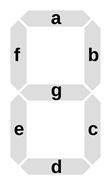

## Les échantillons

In [217]:
S = [
    [1,1,1,1,1,1,0], # L'afficheur affiche 0
    [0,1,1,0,0,0,0], #  L'afficheur affiche 1
    [1,1,0,1,1,0,1], #  L'afficheur affiche 2
    [1,1,1,1,0,0,1], #  L'afficheur affiche 3
    [0,1,1,0,0,1,1], #  L'afficheur affiche 4
    [1,0,1,1,0,1,1], #  L'afficheur affiche 5
    [1,0,1,1,1,1,1], #  L'afficheur affiche 6
    [1,1,1,0,0,0,0], #  L'afficheur affiche 7
    [1,1,1,1,1,1,1], #  L'afficheur affiche 8
    [1,1,1,1,0,1,1]  #  L'afficheur affiche 9
]

## Les sorties désirée 

In [275]:
C = [0,1,0,1,0,1,0,1,0,1]

In [276]:
N2.Set_Weights(w=[1,1,1,1,1,1,1],b=-1)
for X in S:
    print(X,N2.get_output(X))

[1, 1, 1, 1, 1, 1, 0] 1
[0, 1, 1, 0, 0, 0, 0] 1
[1, 1, 0, 1, 1, 0, 1] 1
[1, 1, 1, 1, 0, 0, 1] 1
[0, 1, 1, 0, 0, 1, 1] 1
[1, 0, 1, 1, 0, 1, 1] 1
[1, 0, 1, 1, 1, 1, 1] 1
[1, 1, 1, 0, 0, 0, 0] 1
[1, 1, 1, 1, 1, 1, 1] 1
[1, 1, 1, 1, 0, 1, 1] 1


In [280]:
finished = False
while not finished:
    finished = True
    for i,X in enumerate(S):
        c = C[i]
        o = N2.get_output(X)
        
        N2.Set_Weights(
            w=[N2.Get_Weights()[j]+(c-o)*X[j] for j in range(7)],
            b=N2.Get_Biais()+(c-o)
        )
    
        finished = finished and (c == o)
        

In [281]:
print(N2.Get_Weights(),N2.Get_Biais())

[1, -4, -1, 1, -6, -2, -1] -6


In [282]:
for X in S:
    print(X,N2.get_output(X))

[1, 1, 1, 1, 1, 1, 0] 0
[0, 1, 1, 0, 0, 0, 0] 1
[1, 1, 0, 1, 1, 0, 1] 0
[1, 1, 1, 1, 0, 0, 1] 1
[0, 1, 1, 0, 0, 1, 1] 0
[1, 0, 1, 1, 0, 1, 1] 1
[1, 0, 1, 1, 1, 1, 1] 0
[1, 1, 1, 0, 0, 0, 0] 1
[1, 1, 1, 1, 1, 1, 1] 0
[1, 1, 1, 1, 0, 1, 1] 1
